In [2]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

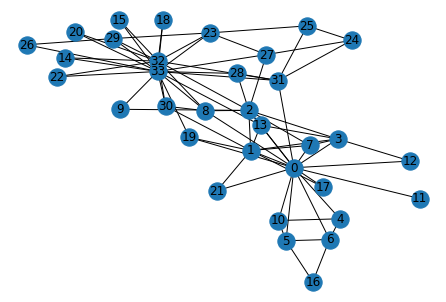

In [118]:
#loading the graph and visualizing it
G = nx.karate_club_graph()

nx.draw(G, with_labels=True)

In [49]:
print("Karate_Club_Graph Nodes : ",len(G.nodes))
print("Karate_Club_Graph Edges : ",len(G.edges))

Karate_Club_Graph Nodes :  34
Karate_Club_Graph Edges :  78


In [53]:
# EBC score for every edge in the graph

G_dict = nx.edge_betweenness_centrality(G)
G_dict

# We will be getting the Dictionary of Edges with there respective EBC Scores

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

In [71]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge
edge_to_remove(G.copy())
# First iteration Edge having Highest EBC Score

(0, 31)

In [70]:
def girven_newman(graph):
    # nx.connected_components(graph) Generate connected components.
    cg=nx.connected_components(graph)
    # nx.connected_components(graph) returns num of connected components.
    cg_count=nx.number_connected_components(graph)
    
    while(cg_count==1):
        graph.remove_edge(edge_to_remove(graph)[0],edge_to_remove(graph)[1])
        cg=nx.connected_components(graph)
        cg_count=nx.number_connected_components(graph)
        
    return cg
girven_newman(G.copy())

<generator object connected_components at 0x000001EBF02D7D60>

In [73]:
# printing set of nodes for each component
comp_nodes=[]
for i in girven_newman(G.copy()):
    print(i)
    comp_nodes.append(list(i))

{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}
{2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


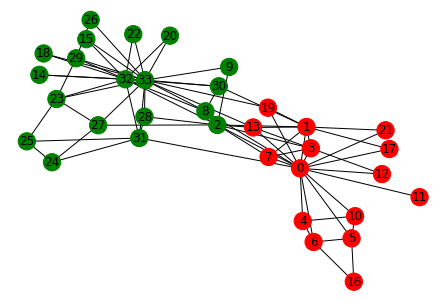

In [88]:
color_map=[]
for node in G:
    if node in comp_nodes[0]:
        color_map.append('red')
    else:
        color_map.append('green')
        
# Visualizing the Communities in karate_club_graph
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()